<h2>Import Librares <h2>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

<h2>Load Graph<h2>

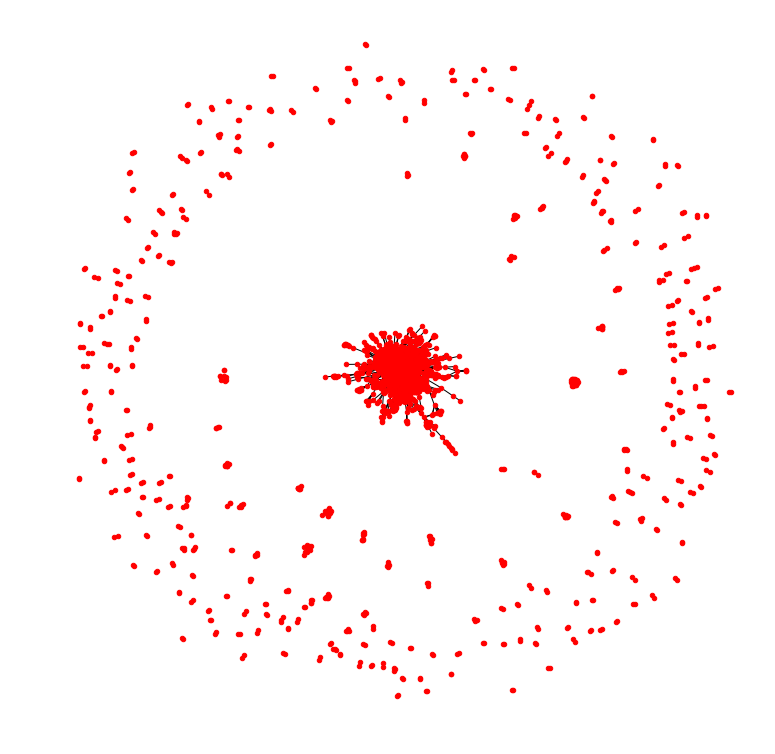

In [4]:
# # G_fb = nx.read_edgelist("facebook_combined.txt")
G_fb = nx.read_weighted_edgelist("h2.txt", delimiter=' ')
plt.figure(figsize=(10,10))
nx.draw(G_fb,node_size = 20,with_labels = False)
plt.show()

<h2>Statistics<h2>

In [5]:
def diameterNet(G_fb):
    try:
        nx.diameter(G_fb)
    except:
        print ("Found infinite path length because the graph is not connected")
print(nx.info(G_fb))
print("Network Diameter: ",diameterNet(G_fb))

Name: 
Type: Graph
Number of nodes: 2803
Number of edges: 3003
Average degree:   2.1427
Found infinite path length because the graph is not connected
('Network Diameter: ', None)


In [6]:
import pandas as pd
import numpy as np
import operator

bc = nx.betweenness_centrality(G_fb, k=None, normalized=True, weight=None, endpoints=False, seed=None)
sorted_x = sorted(bc.items(), key=operator.itemgetter(1))
df = pd.DataFrame(data=sorted_x[-11:-1][::-1],columns=['Node ID', 'Betweenness Value'])

cc = nx.closeness_centrality(G_fb, u=None, distance=None)
sorted_x = sorted(cc.items(), key=operator.itemgetter(1))
df2 = pd.DataFrame(data=sorted_x[-11:-1][::-1],columns=['Node ID', 'Closness Cnetrality Value'])

dc = nx.degree_centrality(G_fb)
sorted_x = sorted(dc.items(), key=operator.itemgetter(1))
df3 = pd.DataFrame(data=sorted_x[-11:-1][::-1],columns=['Node ID', 'Degree Centality Value'])

data = {
    'Measures': ["Density", "Average clustering", "Degree assortative coeff", 
                 "Number of connected components","Average Clustering","Number Of Connected Components"], 
    'Values': [nx.density(G_fb), nx.average_clustering(G_fb), nx.degree_assortativity_coefficient(G_fb), 
               nx.number_connected_components(G_fb),nx.average_clustering(G_fb),nx.number_connected_components(G_fb)]
}
df4 = pd.DataFrame.from_dict(data)
df4

display_side_by_side(df,df2,df3,df4)

,Node ID,Betweenness Value
0,56151,0.123980
1,45848,0.073464
2,339878,0.024103
3,176965,0.020255
4,31483,0.019076
5,4807,0.018650
6,33070,0.018007
7,2977,0.016341
8,11981,0.013531
9,23364,0.013372


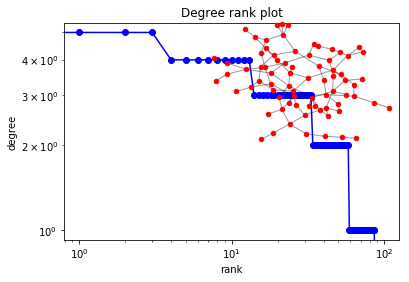

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.gnp_random_graph(100, 0.02)

degree_sequence=sorted([d for n,d in G.degree()],reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()

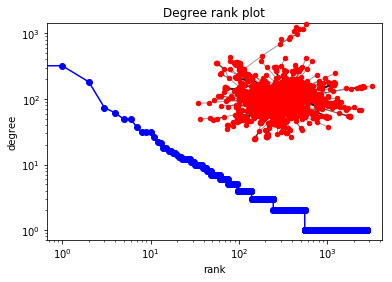

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
G = G_fb

degree_sequence=sorted([d for n,d in G.degree()],reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()

<h2>Comparison with Random Graph<h2>

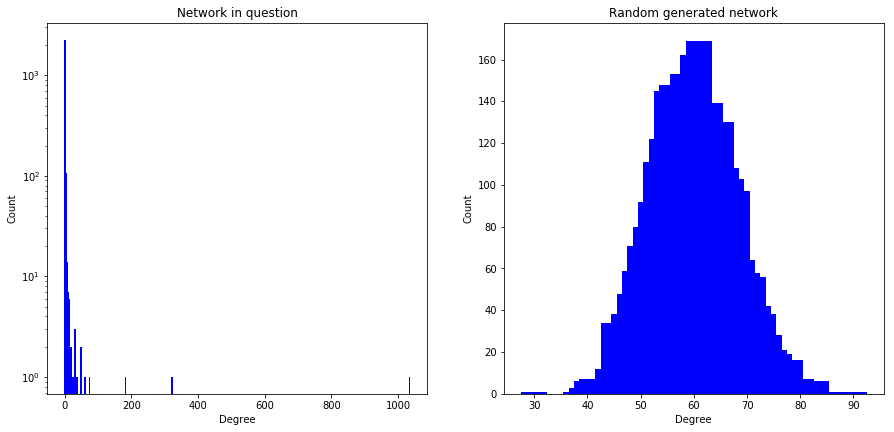

In [9]:
import collections
# G = nx.gnp_random_graph(100, 0.02)
G = G_fb

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(15,15))
# fig, ax = plt.subplots()
plt.subplot(2, 2, 1)
plt.bar(deg, cnt, width=5, color='b')
plt.title("Network in question")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.yscale('log')
# plt.xscale('log')


G = nx.gnp_random_graph(3000, 0.02)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


# fig, ax = plt.subplots()
plt.subplot(2, 2, 2)
plt.bar(deg, cnt, width=5, color='b')
plt.title("Random generated network")
plt.ylabel("Count")
plt.xlabel("Degree")
# plt.yscale('log')
# plt.xscale('log')
plt.show()

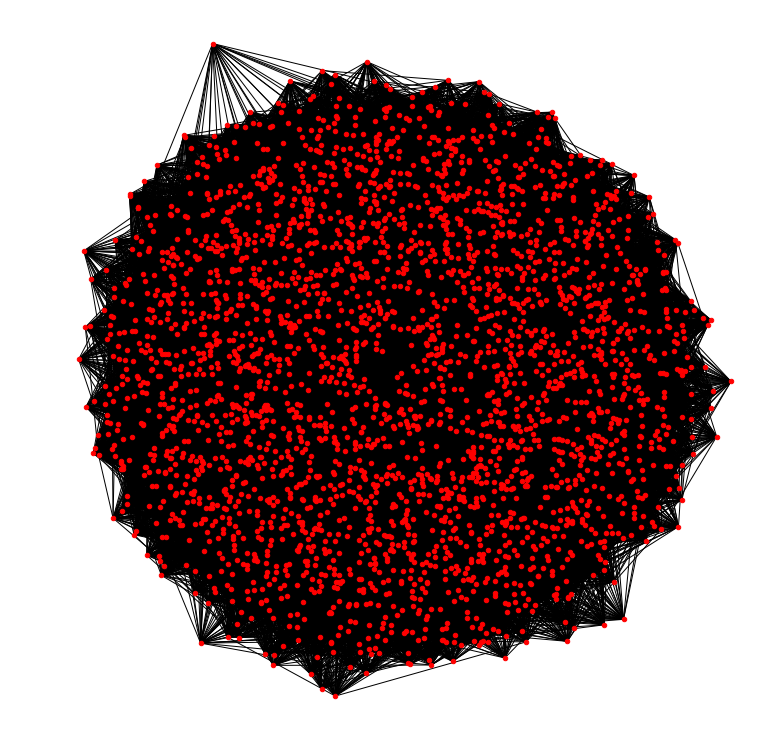

In [10]:
plt.figure(figsize=(10,10))
nx.draw(G,node_size = 20,with_labels = False)
plt.show()

<h2>Conclusion<h2>

1. Does the graph have the same characteristics of a random or a power-law network?

    Anwser: Twitter retweet graph #higgs has more similarities with power law network rather than random network because degree frequency graph is logrithmic in nature (few nodes with very large degree and large number of nodes have very low degree) unlike random network where degree count distrebution is represented by some normal distribution

2. Which are the most important nodes, with respect to a given centrality measure?
    Anwser: Node 56151 has highest betweenes number also it has highest closness cnetrality value and also highest degree centality value. It is the most important node as its the main origin of the tweet #higgs and all other retweets stream from it. 

3. Are the paths short with respect to the size of the network? The average paths are infinite because large number of nodes are not connected to the main graph and just "floating around" where as a random network of simillar size will have average geodesic distance of 3

4. Is the network dense? The network is sparse because its density is 0.000765 (1 is fully connected graph where all nodes are connected to each other, 0 is graph with no edges at all)